## Importing Data from online source

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#read & extract data from url - https://flightaware.com/live/airport/KJFK 
#flight details of aircrafts coming in & out of JFK International Airport is considered
jfk = pd.read_html('https://flightaware.com/live/airport/KJFK')
#jfk

#concatenate arrival, departure, enroute & scheduled flight departure tables into a single pandas df  
jfk = pd.concat(jfk, axis=1, ignore_index=False)
jfk

,"(Arrivals (More), Ident)","(Arrivals (More), Type)","(Arrivals (More), From)","(Arrivals (More), Depart)","(Arrivals (More), Unnamed: 4_level_1)","(Arrivals (More), Arrive)","(Departures (More), Ident)","(Departures (More), Type)","(Departures (More), To)","(Departures (More), Depart)",...,"(En Route/Scheduled to JFK (More), Depart)","(En Route/Scheduled to JFK (More), Unnamed: 4_level_1)","(En Route/Scheduled to JFK (More), Arrive)","(Scheduled Departures (More), Ident)","(Scheduled Departures (More), Type)","(Scheduled Departures (More), To)","(Scheduled Departures (More), Depart)","(Scheduled Departures (More), Unnamed: 4_level_1)","(Scheduled Departures (More), Arrive)",0
0,JBU794,A320,Austin-Bergstrom Intl (AUS),07:20a CDT,NaN,11:30a EDT,RPA4760,E75L,Cleveland-Hopkins Intl (CLE),11:28a EDT,...,06:22a MDT,NaN,11:31a EDT,MNB601,A306,Istanbul Airport (IST),10:10a EDT,NaN,03:50a +03,Your browser is unsupported. upgrade your browser
1,DAL1854,B739,Luis Munoz Marin Intl (SJU),08:03a AST,NaN,11:30a EDT,DAL2964,A321,Fort Lauderdale Intl (FLL),11:27a EDT,...,10:27a EDT,NaN,11:32a EDT,FDX2752,A306,Harrisburg Intl (MDT),11:13a EDT,NaN,11:53a EDT,NaN
2,KAP410,C402,Martha's Vineyard (MVY),10:24a EDT,NaN,11:27a EDT,JBU1993,A320,Miami Intl (MIA),11:26a EDT,...,09:49a BST,NaN,11:32a EDT,CAL5321,B744,Anchorage Intl (ANC),11:14a EDT,NaN,01:43p AKDT,NaN
3,KAP116,C402,Martha's Vineyard (MVY),10:23a EDT,NaN,11:26a EDT,RPA4500,E75L,Norfolk Intl (ORF),11:24a EDT,...,10:24a EDT,NaN,11:35a EDT,RPA4787,E75L,Pittsburgh Intl (PIT),11:20a EDT,NaN,12:18p EDT,NaN
4,SIA26,A388,Frankfurt Int'l (FRA),09:23a CEST,NaN,11:26a EDT,JBU1925,A320,Tampa Intl (TPA),11:23a EDT,...,10:50a EDT,NaN,11:35a EDT,ELY4,B789,Ben Gurion Int'l (TLV),11:26a EDT,NaN,04:15a IDT,NaN
5,DAL1942,B739,Las Americas (SDQ),07:58a AST,NaN,11:25a EDT,AAL708,B738,Miami Intl (MIA),11:22a EDT,...,11:06a EDT,NaN,11:45a EDT,JBU2701,A320,Fort Lauderdale Intl (FLL),11:27a EDT,NaN,01:47p EDT,NaN
6,BAW117,B772,London Heathrow (LHR),09:36a BST,NaN,11:24a EDT,DAL442,B763,San Francisco Int'l (SFO),11:21a EDT,...,07:39a CDT,NaN,11:51a EDT,EDV4832,CRJ9,Raleigh-Durham Intl (RDU),11:27a EDT,NaN,12:41p EDT,NaN
7,JBU1154,A320,Palm Beach Intl (PBI),09:03a EDT,NaN,11:22a EDT,DAL644,B739,Cancun Int'l (CUN),11:19a EDT,...,11:09a EDT,NaN,11:51a EDT,JBU757,A320,Queen Beatrix Int'l (AUA),11:29a EDT,NaN,04:01p AST,NaN
8,AAL2249,A321,Boston Logan Intl (BOS),10:37a EDT,NaN,11:20a EDT,SVA904,B744,Liege (LGG),11:16a EDT,...,09:46a EDT,NaN,11:53a EDT,AAL3,A321,Los Angeles Intl (LAX),11:29a EDT,NaN,02:10p PDT,NaN
9,JBU717,E190,Boston Logan Intl (BOS),10:32a EDT,NaN,11:18a EDT,JBU523,A321,Los Angeles Intl (LAX),11:11a EDT,...,10:09a BST,NaN,11:57a EDT,FLE115,B38M,Toronto Pearson Int'l (YYZ),11:30a EDT,NaN,12:32p EDT,NaN


## Data Cleaning

In [2]:
#data cleaned by remmoving unwanted columns from original data frame & creating a new df
jfk1 = jfk.drop(jfk.columns[[1,3,4,7,10,11,13,15,16,19,22,23,24]], axis=1)

#renaming the columns for ease of reading
jfk1.columns = ['ArrivalFlightNo', 'ArrivalFrom', 'ArrivalTime', 'DeptFlightNo', 'DeptTo', 'DeptTime', 'EnrouteFlightNo','EnrouteFrom','EnrouteArrivalTime','SchDeptFlightNo','SchDeptTo','SchDeptTime']
jfk1

#Cleaning df by filling NaN with NA
jfk1.fillna('NA')

,ArrivalFlightNo,ArrivalFrom,ArrivalTime,DeptFlightNo,DeptTo,DeptTime,EnrouteFlightNo,EnrouteFrom,EnrouteArrivalTime,SchDeptFlightNo,SchDeptTo,SchDeptTime
0,JBU794,Austin-Bergstrom Intl (AUS),11:30a EDT,RPA4760,Cleveland-Hopkins Intl (CLE),11:28a EDT,DAL876,Denver Intl (DEN),11:31a EDT,MNB601,Istanbul Airport (IST),10:10a EDT
1,DAL1854,Luis Munoz Marin Intl (SJU),11:30a EDT,DAL2964,Fort Lauderdale Intl (FLL),11:27a EDT,RPA4836,Pittsburgh Intl (PIT),11:32a EDT,FDX2752,Harrisburg Intl (MDT),11:13a EDT
2,KAP410,Martha's Vineyard (MVY),11:27a EDT,JBU1993,Miami Intl (MIA),11:26a EDT,VIR3,London Heathrow (LHR),11:32a EDT,CAL5321,Anchorage Intl (ANC),11:14a EDT
3,KAP116,Martha's Vineyard (MVY),11:26a EDT,RPA4500,Norfolk Intl (ORF),11:24a EDT,EDV5452,Detroit Metro Wayne Co (DTW),11:35a EDT,RPA4787,Pittsburgh Intl (PIT),11:20a EDT
4,SIA26,Frankfurt Int'l (FRA),11:26a EDT,JBU1925,Tampa Intl (TPA),11:23a EDT,EDV5057,Buffalo Niagara Intl (BUF),11:35a EDT,ELY4,Ben Gurion Int'l (TLV),11:26a EDT
5,DAL1942,Las Americas (SDQ),11:25a EDT,AAL708,Miami Intl (MIA),11:22a EDT,JBU485,Frederick Douglass/Greater Rochester Intl (ROC),11:45a EDT,JBU2701,Fort Lauderdale Intl (FLL),11:27a EDT
6,BAW117,London Heathrow (LHR),11:24a EDT,DAL442,San Francisco Int'l (SFO),11:21a EDT,DAL1166,Austin-Bergstrom Intl (AUS),11:51a EDT,EDV4832,Raleigh-Durham Intl (RDU),11:27a EDT
7,JBU1154,Palm Beach Intl (PBI),11:22a EDT,DAL644,Cancun Int'l (CUN),11:19a EDT,EDV5287,Baltimore/Washington Intl (BWI),11:51a EDT,JBU757,Queen Beatrix Int'l (AUA),11:29a EDT
8,AAL2249,Boston Logan Intl (BOS),11:20a EDT,SVA904,Liege (LGG),11:16a EDT,JBU526,Tampa Intl (TPA),11:53a EDT,AAL3,Los Angeles Intl (LAX),11:29a EDT
9,JBU717,Boston Logan Intl (BOS),11:18a EDT,JBU523,Los Angeles Intl (LAX),11:11a EDT,BAW175,London Heathrow (LHR),11:57a EDT,FLE115,Toronto Pearson Int'l (YYZ),11:30a EDT


## Data analysis

### 1. Flights on ground

In [3]:
# No of aircrafts on ground for the 1hour window
# No of flights arrived in last 30mins which have not departed yet and not scheduled to depart for the next 30mins minus No of flights departed in last 30mins
AircraftsOnGround = pd.concat([jfk1['ArrivalFlightNo'], jfk1['SchDeptFlightNo'], jfk1['EnrouteFlightNo']]).nunique() - len(jfk1['DeptFlightNo'])
AircraftsOnGround

37

### 2. Destination fight details

In [4]:
#taking input from the user to find out the flight details to their requested destination
print("Where would you like to go?")
inp = input()

#drops NA valued element in column and returns required details
jfk1[['SchDeptFlightNo','SchDeptTo','SchDeptTime']][jfk1.SchDeptTo.notnull()][jfk1.SchDeptTo.dropna().str.contains(inp)]

Where would you like to go?
IST


,SchDeptFlightNo,SchDeptTo,SchDeptTime
0,MNB601,Istanbul Airport (IST),10:10a EDT


### 3. Arrival or Enroute flight details

In [17]:
#for people waiting to pick up a person at arrival gate, taking flight number and suggesting if the flight has landed or about to land
#Then provide flight details 
print("Waiting at arrival gate, what's the arrival flight number?")
inp = input()

m = jfk1[['EnrouteFrom','EnrouteArrivalTime']][jfk1.EnrouteFlightNo.notnull()][jfk1.EnrouteFlightNo.dropna().str.contains(inp)]

#checking if flight arrived or enroute
if m.empty == True:
    print('Already arrived & details as below:')
    n = jfk1[['ArrivalFrom','ArrivalTime']][jfk1.ArrivalFlightNo.notnull()][jfk1.ArrivalFlightNo.dropna().str.contains(inp)]
    print(n)
else:
    print('Yet to arrive & details as below:')
    print(m)

Waiting at arrival gate, what's the arrival flight number?
JBU20
Already arrived & details as below:
              ArrivalFrom ArrivalTime
13  London Heathrow (LHR)  11:08a EDT


### 4. Frequency distribution plot of arrived, enroute, departed and scheduled flights for one hour

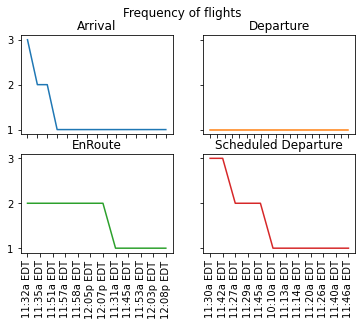

In [7]:
#create subplots of 2x2 plots
fig, axs = plt.subplots(2, 2, sharey=True)

#counts of flights in each category
x1 = jfk1.ArrivalTime.value_counts()
x2 = jfk1.DeptTime.value_counts()
x3 = jfk1.EnrouteArrivalTime.value_counts()
x4 = jfk1.SchDeptTime.value_counts()
y = [1,2,3,4]

#plot frequency 
axs[0, 0].plot(x1)
axs[0, 0].set_title('Arrival')
axs[0, 1].plot(x2, 'tab:orange')
axs[0, 1].set_title('Departure')
axs[1, 0].plot(x3, 'tab:green')
axs[1, 0].set_title('EnRoute')
axs[1, 1].plot(x4, 'tab:red')
axs[1, 1].set_title('Scheduled Departure')

#rotate x axis ticks for better readability
for tick in axs[1,0].get_xticklabels():
    tick.set_rotation(90)
for tick in axs[1,1].get_xticklabels():
    tick.set_rotation(90)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Frequency of flights')
plt.show()
#plt.savefig('Arrival Frequency.png')

import warnings
warnings.filterwarnings("ignore")